In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Set up environment and import dataset

In [15]:
# import packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
timecourse_t = pd.read_excel('/content/drive/MyDrive/Monash_data_science/24s2/BMS5021/topic_3/Translatome_measurements_use.xlsx')
timecourse_p = pd.read_excel('/content/drive/MyDrive/Monash_data_science/24s2/BMS5021/topic_3/Timecourse of proteome measurements.xlsx', sheet_name='Table')
covid_protein = pd.read_excel('/content/drive/MyDrive/Monash_data_science/24s2/BMS5021/topic_3/SARS-CoV-2 proteins.xlsx')

## Data overview and pre-processing

In [17]:
# log 10 transformation
epsilon = 1e-6

# Columns containing expression data where 'Control' or 'Virus' is in the column name
expression_columns = [col for col in timecourse_t.columns if 'Control' in col or 'Virus' in col]

# Apply log10 transformation after adding a small constant
timecourse_t[expression_columns] = timecourse_t[expression_columns].apply(lambda x: np.log10(x + epsilon))

In [18]:
# separate human and viral protein based on organism column
# 'Homo sapiens OX=9606', 'SARS-CoV-2'

human_timecourse = timecourse_t[timecourse_t['Organism'] == 'Homo sapiens OX=9606']
covid_timecourse = timecourse_t[timecourse_t['Organism'] == 'SARS-CoV-2']

In [19]:
# overview of human protein
human_timecourse

,UniProt Accession,Organism,Gene Symbol,Control 2h_1,Control 2h_2,Control 2h_3,Control 6h_1,Control 6h_2,Control 6h_3,Control 10h_1,...,Virus 24h_2,Virus 24h_3,Ratio 2h,Ratio 6h,Ratio 10h,Ratio 24h,P value 2h,P value 6h,P value 10h,P value 24h
0,P02771,Homo sapiens OX=9606,AFP,2.991783,3.073049,3.158461,3.081077,3.126514,3.109407,2.966283,...,1.691757,1.872369,-0.236188,-0.327616,-0.136694,-4.473082,0.490451,0.061289,0.599956,0.000179
1,P07148,Homo sapiens OX=9606,FABP1,3.115614,3.107227,3.083073,3.062310,3.041688,2.965349,2.888399,...,1.954379,0.190575,-0.177061,-0.347504,-0.140953,-3.278822,0.037763,0.058714,0.792982,0.000178
2,P09327,Homo sapiens OX=9606,VIL1,2.924162,3.013294,2.987880,2.934650,2.994763,2.983327,2.877048,...,1.949941,1.868191,-0.150779,-0.279991,-0.645486,-3.444579,0.398441,0.052874,0.016658,0.000165
3,P05783,Homo sapiens OX=9606,KRT18,2.781598,2.861794,2.894379,3.102054,3.119931,3.147947,3.113024,...,2.577153,2.822874,-0.096411,-0.017061,-0.157926,-0.229857,0.603719,0.884344,0.328675,0.583561
4,Q9P2E9,Homo sapiens OX=9606,RRBP1,2.836528,2.803855,2.824840,2.918076,2.900205,2.827361,2.800383,...,2.013817,2.131179,-0.135448,-0.163304,-0.440900,-2.140370,0.092775,0.258608,0.032700,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,O14950,Homo sapiens OX=9606,MYL12B; MYL12A,1.709840,0.359566,-0.034262,1.826551,0.159500,0.089765,1.869322,...,0.479115,0.112740,0.115716,0.135050,-1.062063,-0.254381,0.952604,0.947660,0.652076,0.897892
2711,P12532,Homo sapiens OX=9606,CKMT1B; CKMT1A,-0.049478,-0.295440,0.172113,0.141870,0.095306,-0.028297,-0.158763,...,0.127478,0.464207,0.394714,0.057418,-0.076111,0.256455,0.369705,0.882933,0.833130,0.655414
2712,P61204,Homo sapiens OX=9606,ARF3,0.747337,-0.251836,0.090642,0.975346,0.322644,-0.023477,1.205756,...,-0.157150,0.214352,-0.137935,0.180903,-1.004122,1.186972,0.914024,0.902474,0.604175,0.557198
2713,Q5H9L2,Homo sapiens OX=9606,TCEAL5,0.998204,0.394772,0.067941,0.731420,0.651787,0.067180,0.941624,...,1.035354,0.298130,0.422933,0.194327,-1.562233,0.527446,0.719585,0.822455,0.206675,0.538217


In [20]:
# overview of viral protein
covid_timecourse

,UniProt Accession,Organism,Gene Symbol,Control 2h_1,Control 2h_2,Control 2h_3,Control 6h_1,Control 6h_2,Control 6h_3,Control 10h_1,...,Virus 24h_2,Virus 24h_3,Ratio 2h,Ratio 6h,Ratio 10h,Ratio 24h,P value 2h,P value 6h,P value 10h,P value 24h
934,P0DTC2,SARS-CoV-2,NaN,0.134294,-0.104433,0.348130,0.120327,-0.072963,1.197140,-0.147701,...,3.587292,3.296099,1.184392,5.438205,8.415059,8.902127,0.529105,0.006862,0.018798,0.015140
1115,P0DTC8,SARS-CoV-2,NaN,0.976402,-0.019990,0.867534,1.044417,0.198891,1.036334,0.552322,...,3.026748,2.429827,-0.577639,2.385625,6.010551,6.663208,0.554032,0.045858,0.112146,0.108459
1409,P0DTD2,SARS-CoV-2,NaN,0.009287,-0.226224,0.181114,-0.189919,-0.073438,0.056675,0.393629,...,2.890372,2.273680,0.760166,5.271856,7.224034,8.754183,0.523347,0.007432,0.036596,0.040991
1494,P0DTC9,SARS-CoV-2,NaN,0.265997,0.391848,0.090823,1.014418,0.439852,-0.127384,0.794597,...,4.059237,3.854257,-1.047701,7.933790,11.168525,14.158108,0.091440,0.005218,0.004665,0.008454
1496,P0DTC7,SARS-CoV-2,NaN,-0.382081,0.333471,0.018207,-0.135881,-0.219507,0.117059,-0.193879,...,2.754460,3.067238,-0.027188,6.319584,8.123193,9.315425,0.967251,0.167373,0.090049,0.089433


### row issues with dataset

In [21]:
len(timecourse_t['UniProt Accession'].unique())

2712

In [22]:
len(human_timecourse['UniProt Accession'].unique())

2707

In [23]:
len(covid_timecourse['UniProt Accession'].unique())

5

## How many proteins were quantified in the translatome dataset compared to the proteome dataset? What potential reason(s) may explain any difference?


For proteome timecourse dataset, there are 9 viral proteins, and 6371 human proteins.

For translatome timecourse dataset, there are 5 viral proteins, and 2710 human proteins.

The reason could be:
- not all proteins will be translated
- the ms process is not very sensitive, we only add the heavy arginine and heavy lysine at each time point and measure it immediately, the newly sythesised protein may not be enough to be detected

## What is the translatome expression profile for each SARS-CoV-2 protein?

Consider plotting the raw expression values for the control and infected samples (e.g. similar to below) vs time, and/or plotting the ratio values vs time. Do these profiles look at different to the proteome expression profiles from Week 10?
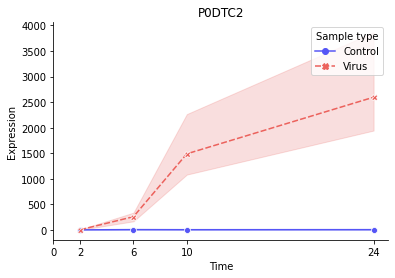


In [24]:
# get the list of viral proteins
viral_proteins = covid_timecourse['UniProt Accession'].unique()
viral_proteins

array(['P0DTC2', 'P0DTC8', 'P0DTD2', 'P0DTC9', 'P0DTC7'], dtype=object)

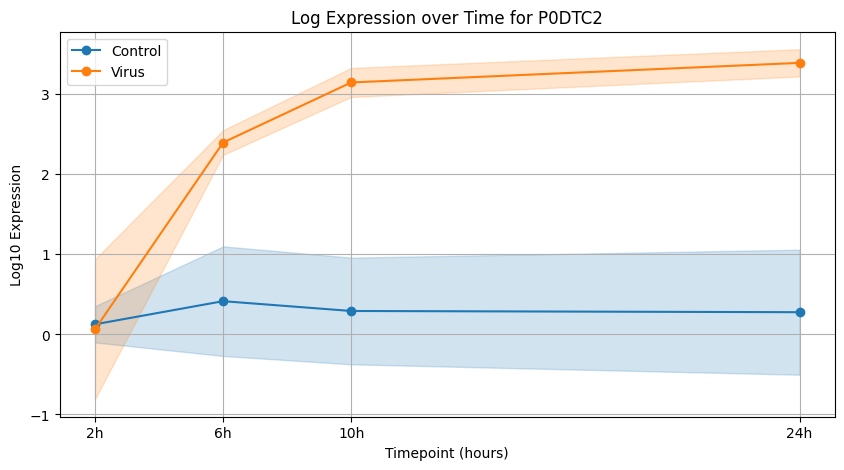

In [25]:
# the viral proteins are: 'P0DTC2', 'P0DTC8', 'P0DTD2', 'P0DTC9', 'P0DTC7'
# Sample data extraction for one protein

protein_id = 'P0DTC2'
data = covid_timecourse[covid_timecourse['UniProt Accession'] == protein_id]

# Define timepoints, samples, and numeric representation for proportional x-axis
timepoints = ['2h', '6h', '10h', '24h']
timepoint_hours = [2, 6, 10, 24]  # Hours for x-axis
samples = ['Control', 'Virus']

# Preparing the plot data
plot_data = {'Control': [], 'Virus': []}
plot_std = {'Control': [], 'Virus': []}  # Store standard deviations

for timepoint in timepoints:
    for sample in samples:
        cols = [col for col in data.columns if col.startswith(f'{sample} {timepoint}')]
        mean_value = data[cols].mean(axis=1).values  # Mean across replicates
        std_value = data[cols].std(axis=1).values  # Standard deviation across replicates
        plot_data[sample].append(mean_value[0] if mean_value.size > 0 else np.nan)
        plot_std[sample].append(std_value[0] if std_value.size > 0 else np.nan)

# Convert lists to numpy arrays for plotting
control_data = np.array(plot_data['Control'])
virus_data = np.array(plot_data['Virus'])
control_std = np.array(plot_std['Control'])
virus_std = np.array(plot_std['Virus'])

# Create a plot with shaded error area
plt.figure(figsize=(10, 5))
for sample, color in zip(['Control', 'Virus'], ['#1f77b4', '#ff7f0e']):  # Blue for control, orange for virus
    mean_data = np.array(plot_data[sample])
    std_data = np.array(plot_std[sample])
    plt.plot(timepoint_hours, mean_data, marker='o', linestyle='-', color=color, label=sample)
    plt.fill_between(timepoint_hours, mean_data - std_data, mean_data + std_data, color=color, alpha=0.2)

# Adding title and labels
plt.title(f'Log Expression over Time for {protein_id}')
plt.xlabel('Timepoint (hours)')
plt.ylabel('Log10 Expression')
plt.xticks(timepoint_hours, labels=timepoints)
plt.legend()
plt.grid(True)
plt.show()


As we can see, the width of the variance were quite consistent, this could be because of the missing data imuptation were done in the dataset provided.

Here's the code to show all viral protein at once.

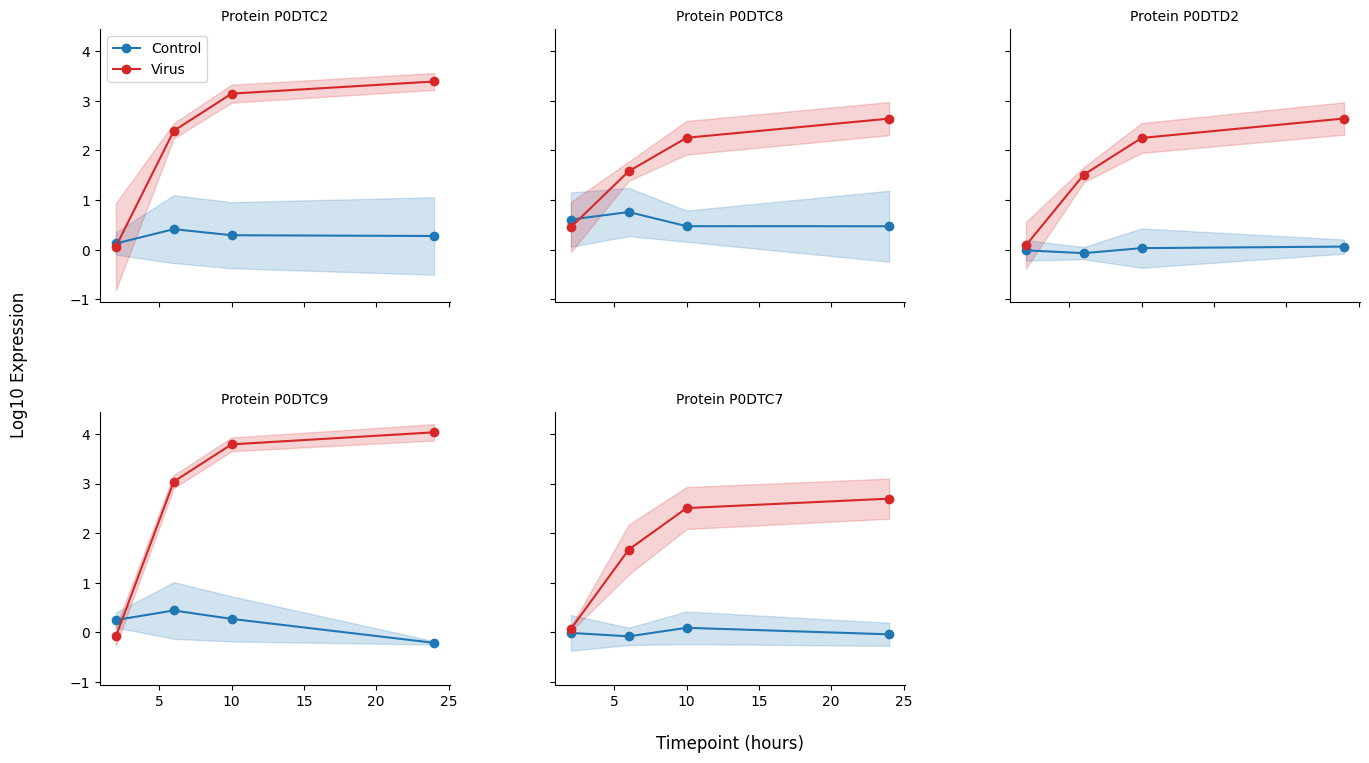

In [26]:
# List of viral proteins to plot
viral_proteins = ['P0DTC2', 'P0DTC8', 'P0DTD2', 'P0DTC9', 'P0DTC7']

# Define timepoints and their numeric values for plotting on x-axis
timepoints = ['2h', '6h', '10h', '24h']
timepoint_hours = [2, 6, 10, 24]  # x-axis values
samples = ['Control', 'Virus']

# Set up a 2x3 grid (2 rows, 3 columns) for 5 protein subplots, with an extra plot space if needed
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)

# Loop through each protein and plot its data
for i, protein_id in enumerate(viral_proteins):
    data = covid_timecourse[covid_timecourse['UniProt Accession'] == protein_id]

    # Initialize data and standard deviation storage
    plot_data = {'Control': [], 'Virus': []}
    plot_std = {'Control': [], 'Virus': []}

    for timepoint in timepoints:
        for sample in samples:
            cols = [col for col in data.columns if col.startswith(f'{sample} {timepoint}')]
            mean_value = data[cols].mean(axis=1).values  # Mean across replicates
            std_value = data[cols].std(axis=1).values  # Standard deviation across replicates
            plot_data[sample].append(mean_value[0] if mean_value.size > 0 else np.nan)
            plot_std[sample].append(std_value[0] if std_value.size > 0 else np.nan)

    # Convert lists to numpy arrays for plotting
    control_data = np.array(plot_data['Control'])
    virus_data = np.array(plot_data['Virus'])
    control_std = np.array(plot_std['Control'])
    virus_std = np.array(plot_std['Virus'])

    # Select the appropriate subplot
    ax = axes[i // 3, i % 3]

    # Colors for control and virus data
    color_virus = '#d62728'  # Red for viral proteins
    color_control = '#1f77b4'  # Blue for human proteins

    # Plot Control (blue) and Virus (red) with shaded confidence intervals
    for j, (sample, color) in enumerate([('Control', color_control), ('Virus', color_virus)]):
        mean_data = np.array(plot_data[sample])
        std_data = np.array(plot_std[sample])

        # Only show label in the first subplot
        label = sample if i == 0 else None
        ax.plot(timepoint_hours, mean_data, marker='o', linestyle='-', color=color, label=label)
        ax.fill_between(timepoint_hours, mean_data - std_data, mean_data + std_data, color=color, alpha=0.2)

    # Setting title and hiding extra spines
    ax.set_title(f'Protein {protein_id}', fontsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust layout to add padding for x and y-axis labels
plt.subplots_adjust(left=0.08, right=0.92, bottom=0.1, top=0.92, wspace=0.3, hspace=0.4)

# Adding shared x-axis and y-axis labels for the figure, with adjusted padding
fig.text(0.5, 0.02, 'Timepoint (hours)', ha='center', fontsize=12)
fig.text(0.02, 0.5, 'Log10 Expression', va='center', rotation='vertical', fontsize=12)

# Show legend only once
axes[0, 0].legend(loc='upper left')

# Hide the last subplot (bottom right) as it's not needed
axes[1, 2].axis('off')

plt.show()


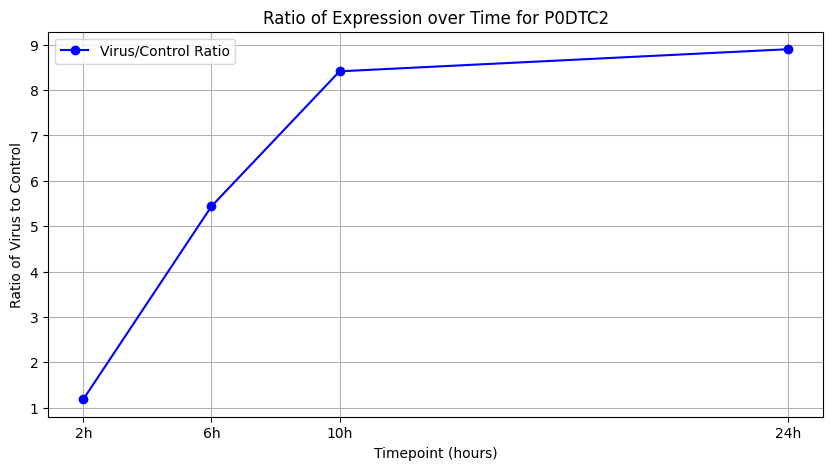

In [27]:
# Sample data extraction for one protein using ratio

protein_id = 'P0DTC2'
data = covid_timecourse[covid_timecourse['UniProt Accession'] == protein_id]

# Define timepoints and numeric representation for proportional x-axis
timepoints = ['2h', '6h', '10h', '24h']
timepoint_hours = [2, 6, 10, 24]  # Hours for x-axis

# Prepare the plot data for ratios
ratios = []

for timepoint in timepoints:
    col_name = f'Ratio {timepoint}'
    value = data[col_name].values  # Get the value for the ratio at each timepoint
    ratios.append(value[0] if len(value) > 0 else np.nan)  # Append the ratio or NaN if missing

# Convert list to numpy array for plotting
ratios = np.array(ratios)

# Create a plot
plt.figure(figsize=(10, 5))
plt.plot(timepoint_hours, ratios, marker='o', linestyle='-', color='blue', label='Virus/Control Ratio')

# Adding title and labels
plt.title(f'Ratio of Expression over Time for {protein_id}')
plt.xlabel('Timepoint (hours)')
plt.ylabel('Ratio of Virus to Control')
plt.xticks(timepoint_hours, labels=timepoints)
plt.legend()
plt.grid(True)
plt.show()

## Compare average ratio across viral and human protein

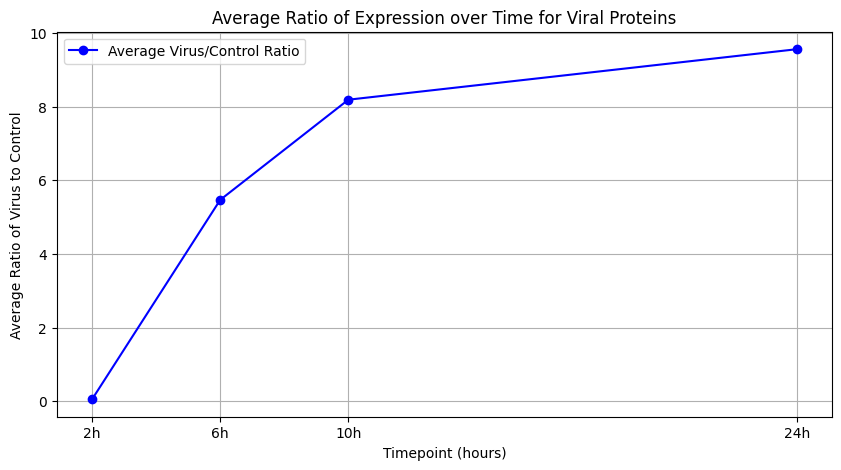

In [28]:
# Define timepoints and numeric representation for proportional x-axis
timepoints = ['2h', '6h', '10h', '24h']
timepoint_hours = [2, 6, 10, 24]  # Hours for x-axis

# Prepare the plot data for average ratios
average_ratios = []

for timepoint in timepoints:
    col_name = f'Ratio {timepoint}'
    # Calculate the mean ratio for all viral proteins at each timepoint
    mean_ratio = covid_timecourse[col_name].mean()
    average_ratios.append(mean_ratio)

# Convert list to numpy array for plotting
average_ratios = np.array(average_ratios)

# Create a plot
plt.figure(figsize=(10, 5))
plt.plot(timepoint_hours, average_ratios, marker='o', linestyle='-', color='blue', label='Average Virus/Control Ratio')

# Adding title and labels
plt.title('Average Ratio of Expression over Time for Viral Proteins')
plt.xlabel('Timepoint (hours)')
plt.ylabel('Average Ratio of Virus to Control')
plt.xticks(timepoint_hours, labels=timepoints)
plt.legend()
plt.grid(True)
plt.show()

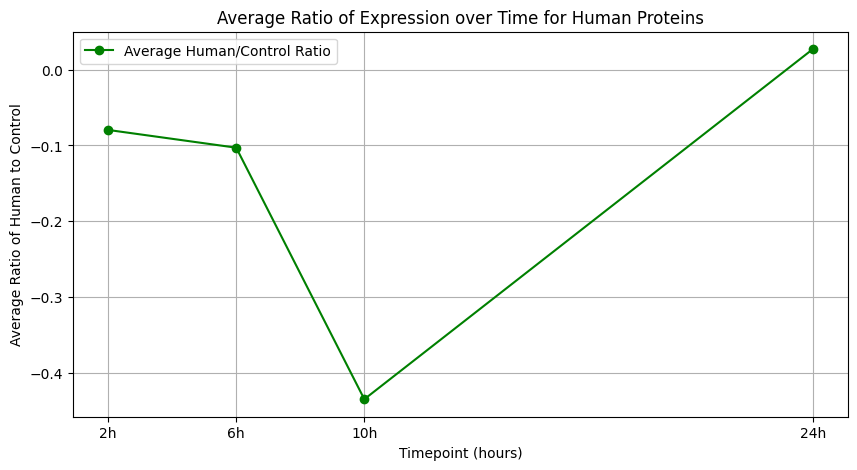

In [29]:
# Define timepoints and numeric representation for proportional x-axis
timepoints = ['2h', '6h', '10h', '24h']
timepoint_hours = [2, 6, 10, 24]  # Hours for x-axis

# Prepare the plot data for average ratios
average_ratios = []

for timepoint in timepoints:
    col_name = f'Ratio {timepoint}'
    # Calculate the mean ratio for all human proteins at each timepoint
    mean_ratio = human_timecourse[col_name].mean()
    average_ratios.append(mean_ratio)

# Convert list to numpy array for plotting
average_ratios = np.array(average_ratios)

# Create a plot
plt.figure(figsize=(10, 5))
plt.plot(timepoint_hours, average_ratios, marker='o', linestyle='-', color='green', label='Average Human/Control Ratio')

# Adding title and labels
plt.title('Average Ratio of Expression over Time for Human Proteins')
plt.xlabel('Timepoint (hours)')
plt.ylabel('Average Ratio of Human to Control')
plt.xticks(timepoint_hours, labels=timepoints)
plt.legend()
plt.grid(True)
plt.show()

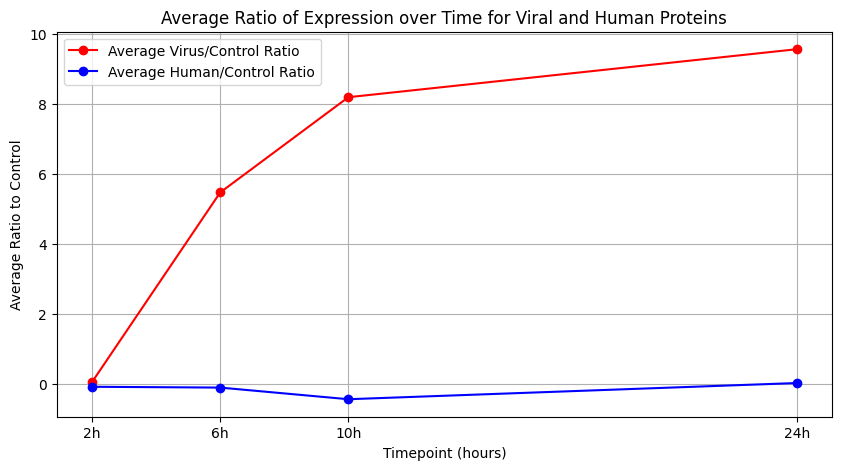

In [30]:


# Define timepoints and numeric representation for proportional x-axis
timepoints = ['2h', '6h', '10h', '24h']
timepoint_hours = [2, 6, 10, 24]  # Hours for x-axis

# Prepare the plot data for average ratios for viral proteins
average_ratios_viral = []
for timepoint in timepoints:
    col_name = f'Ratio {timepoint}'
    mean_ratio = covid_timecourse[col_name].mean()
    average_ratios_viral.append(mean_ratio)
average_ratios_viral = np.array(average_ratios_viral)

# Prepare the plot data for average ratios for human proteins
average_ratios_human = []
for timepoint in timepoints:
    col_name = f'Ratio {timepoint}'
    mean_ratio = human_timecourse[col_name].mean()
    average_ratios_human.append(mean_ratio)
average_ratios_human = np.array(average_ratios_human)

# Create a single plot for both viral and human ratios
plt.figure(figsize=(10, 5))

# Plot viral protein ratios in red
plt.plot(timepoint_hours, average_ratios_viral, marker='o', linestyle='-', color='red', label='Average Virus/Control Ratio')

# Plot human protein ratios in blue
plt.plot(timepoint_hours, average_ratios_human, marker='o', linestyle='-', color='blue', label='Average Human/Control Ratio')

# Adding title and labels
plt.title('Average Ratio of Expression over Time for Viral and Human Proteins')
plt.xlabel('Timepoint (hours)')
plt.ylabel('Average Ratio to Control')
plt.xticks(timepoint_hours, labels=timepoints)
plt.legend()
plt.grid(True)
plt.show()


## How does the overall translatome change at each timepoint?

What data visualisation(s) would best show this?

In [31]:
# perform -log10 transform for the p values at each time point

# Define the timepoints
timepoints = ['2h', '6h', '10h', '24h']

# Create a new DataFrame to hold the modified data
transformed_data_human = human_timecourse[['UniProt Accession', 'Gene Symbol']].copy()

# Perform -log10 transformation on P values and copy over ratio values
for tp in timepoints:
    p_value_col = f'P value {tp}'
    ratio_col = f'Ratio {tp}'
    log_p_value_col = f'-log10 P value {tp}'

    # -log10 transformation of the P values
    transformed_data_human[log_p_value_col] = -np.log10(human_timecourse[p_value_col])

    # Copy over the ratio values
    transformed_data_human[ratio_col] = human_timecourse[ratio_col]

# Now, 'transformed_data' contains the transformed p-values and the ratio values
# Display the transformed data
print(transformed_data_human.head())

# Optional: Save this to a new CSV for further use
transformed_data_human.to_csv('transformed_timecourse_data.csv', index=False)

  UniProt Accession Gene Symbol  -log10 P value 2h  Ratio 2h  \
0            P02771         AFP           0.309404 -0.236188   
1            P07148       FABP1           1.422928 -0.177061   
2            P09327        VIL1           0.399636 -0.150779   
3            P05783       KRT18           0.219165 -0.096411   
4            Q9P2E9       RRBP1           1.032567 -0.135448   

   -log10 P value 6h  Ratio 6h  -log10 P value 10h  Ratio 10h  \
0           1.212621 -0.327616            0.221881  -0.136694   
1           1.231256 -0.347504            0.100737  -0.140953   
2           1.276756 -0.279991            1.778368  -0.645486   
3           0.053379 -0.017061            0.483234  -0.157926   
4           0.587358 -0.163304            1.485449  -0.440900   

   -log10 P value 24h  Ratio 24h  
0            3.747993  -4.473082  
1            3.749349  -3.278822  
2            3.783388  -3.444579  
3            0.233914  -0.229857  
4            4.700190  -2.140370  


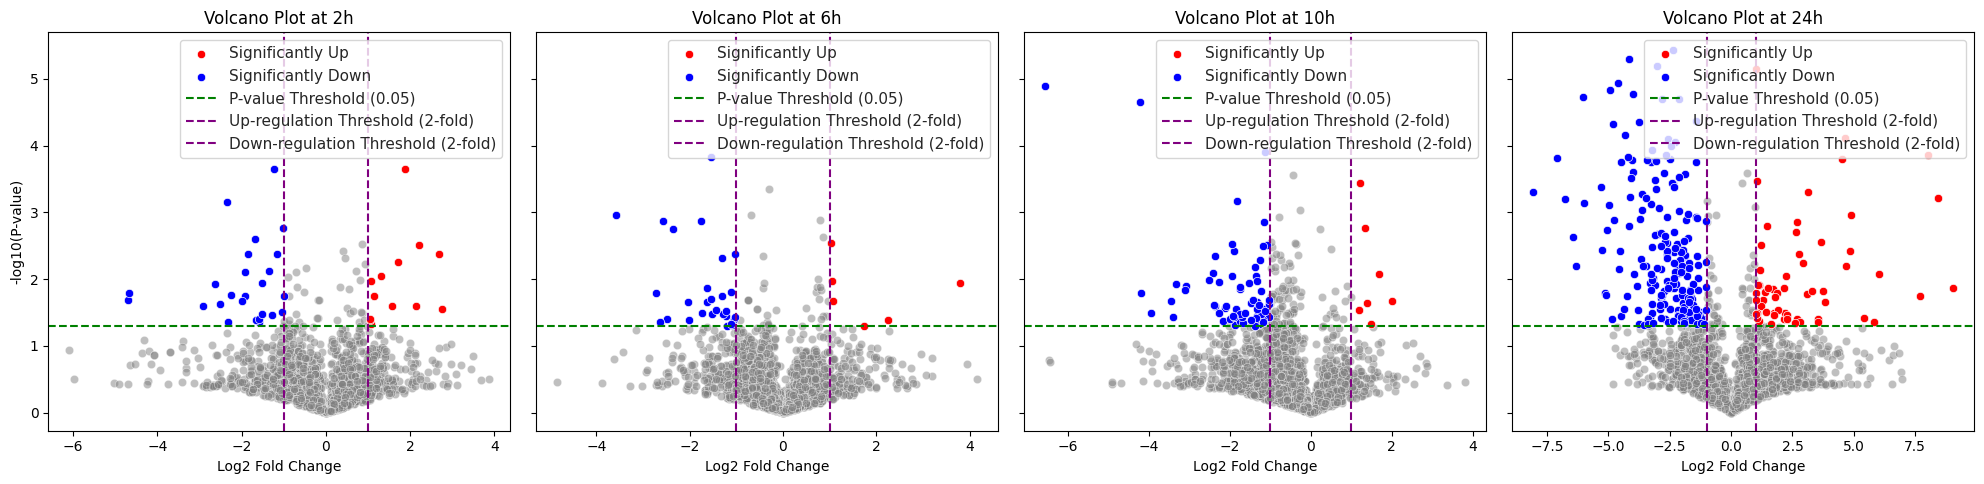

In [32]:
# use the transformed_data_human to produce volcano plot

# Define timepoints
timepoints = ['2h', '6h', '10h', '24h']

# Create a figure with subplots
fig, axes = plt.subplots(1, len(timepoints), figsize=(20, 5), sharey=True)

# Set global aesthetics for seaborn
sns.set(style="whitegrid")

for i, tp in enumerate(timepoints):
    ax = axes[i]
    ratio_col = f'Ratio {tp}'
    log_p_value_col = f'-log10 P value {tp}'

    # Plotting all data points
    sns.scatterplot(x=ratio_col, y=log_p_value_col, data=transformed_data_human, ax=ax, color='gray', alpha=0.5)

    # Highlighting significantly up-regulated proteins
    significantly_up = transformed_data_human[(transformed_data_human[ratio_col] >= 1) & (transformed_data_human[log_p_value_col] >= 1.3)]
    sns.scatterplot(x=ratio_col, y=log_p_value_col, data=significantly_up, ax=ax, color='red', label='Significantly Up')

    # Highlighting significantly down-regulated proteins
    significantly_down = transformed_data_human[(transformed_data_human[ratio_col] <= -1) & (transformed_data_human[log_p_value_col] >= 1.3)]
    sns.scatterplot(x=ratio_col, y=log_p_value_col, data=significantly_down, ax=ax, color='blue', label='Significantly Down')

    # Adding reference lines for significance thresholds
    ax.axhline(y=1.3, color='green', linestyle='--', label='P-value Threshold (0.05)')
    ax.axvline(x=1, color='purple', linestyle='--', label='Up-regulation Threshold (2-fold)')
    ax.axvline(x=-1, color='purple', linestyle='--', label='Down-regulation Threshold (2-fold)')

    # Adding titles and labels
    ax.set_title(f'Volcano Plot at {tp}')
    ax.set_xlabel('Log2 Fold Change')
    ax.set_ylabel('-log10(P-value)')

    # Adding legend
    ax.legend()

plt.tight_layout()
plt.show()

## Are certain human proteins highly up- or –down-regulated during infection?

(To simplify your analysis, it may be best to focus mainly on the 24h timepoint.) What are the known functions of these proteins?

In [33]:
# separate transformed_data_human based on time point

# Define the columns for each timepoint
timepoint_columns_2h = ['UniProt Accession', 'Gene Symbol', '-log10 P value 2h', 'Ratio 2h']
timepoint_columns_6h = ['UniProt Accession', 'Gene Symbol', '-log10 P value 6h', 'Ratio 6h']
timepoint_columns_10h = ['UniProt Accession', 'Gene Symbol', '-log10 P value 10h', 'Ratio 10h']
timepoint_columns_24h = ['UniProt Accession', 'Gene Symbol', '-log10 P value 24h', 'Ratio 24h']

# Create separate dataframes for each time point
transformed_data_human_2h = transformed_data_human[timepoint_columns_2h]
transformed_data_human_6h = transformed_data_human[timepoint_columns_6h]
transformed_data_human_10h = transformed_data_human[timepoint_columns_10h]
transformed_data_human_24h = transformed_data_human[timepoint_columns_24h]

In [34]:
# Filtering function for significant proteins
def extract_significant_proteins(df, p_value_col, ratio_col):
    # Adjusting the P value threshold from 1.3 (P < 0.05) to 3 (P < 0.001)
    filtered_df = df[(df[p_value_col] > 3) & ((df[ratio_col] >= 1) | (df[ratio_col] <= -1))]
    up_regulated = filtered_df[filtered_df[ratio_col] >= 1][['UniProt Accession', 'Gene Symbol']]
    down_regulated = filtered_df[filtered_df[ratio_col] <= -1][['UniProt Accession', 'Gene Symbol']]
    return up_regulated, down_regulated

# Applying the function for each time point
up_2h, down_2h = extract_significant_proteins(transformed_data_human_2h, '-log10 P value 2h', 'Ratio 2h')
up_6h, down_6h = extract_significant_proteins(transformed_data_human_6h, '-log10 P value 6h', 'Ratio 6h')
up_10h, down_10h = extract_significant_proteins(transformed_data_human_10h, '-log10 P value 10h', 'Ratio 10h')
up_24h, down_24h = extract_significant_proteins(transformed_data_human_24h, '-log10 P value 24h', 'Ratio 24h')

In [35]:
print(f"up_24h: {up_24h}")

up_24h:      UniProt Accession Gene Symbol
12              Q7Z3J2    C16orf62
1330            Q03701       CEBPZ
1462            P31150        GDI1
1498            P06733        ENO1
1501            Q04695       KRT17
1542            P25705      ATP5A1
2568            Q9H2G2         SLK


In [36]:
print(f"down_24h: {down_24h}")

down_24h:      UniProt Accession            Gene Symbol
0               P02771                    AFP
1               P07148                  FABP1
2               P09327                   VIL1
4               Q9P2E9                  RRBP1
5               P09525                  ANXA4
8               Q12864                  CDH17
9               P17931                 LGALS3
10              P01009               SERPINA1
11              O75874                   IDH1
13              P02766                    TTR
17              P14923                    JUP
19              O14745               SLC9A3R1
20              P00352                ALDH1A1
25              P07305                   H1F0
26              P02647                  APOA1
28              P04181                    OAT
29              P16403               HIST1H1C
33              Q16850                CYP51A1
40              P27487                   DPP4
44              P10412               HIST1H1E
50              P07858  

### notes for the dataset

For situation like this "H3F3A; H3F3AP4; H3F3B", the first one is the most confident one, we usually remove everything after the first semi colon.


For this record: "119             Q9UHD8    2024-09-09 00:00:00"
excel is mistaken the gene symbol of "Q9UHD8", "SEPTIN9", as a date

## What is the correlation between the fold-change expression observed at the proteome level and the fold change expression observed at the translatome level?

- How can you show this?

- What does the result tell you?

- Can you restrict/visualise on the SARS-CoV-2 proteins only?

- What’s the correlation like for these?

### check the common rows

In [37]:
protein_t = timecourse_t['UniProt Accession'].unique()
len(protein_t)

2712

In [38]:
protein_p = timecourse_p['UniProt Accession'].unique()
len(protein_p)

6380

In [39]:
common_proteins = np.intersect1d(protein_t, protein_p)
len(common_proteins)

2712

### check the correlation based on the ratio

In [40]:
# join timecourse_t and timecourse_p based on UniProt Accession column

# Assuming timecourse_p and timecourse_t are already defined dataframes
# Rename columns in both dataframes to differentiate their 'Ratio' values
timecourse_p = timecourse_p.rename(columns=lambda x: x.replace('Ratio', 'Ratio_p') if 'Ratio' in x else x)
timecourse_t = timecourse_t.rename(columns=lambda x: x.replace('Ratio', 'Ratio_t') if 'Ratio' in x else x)

# Merge the dataframes on 'UniProt Accession' using inner join to keep only matching entries in both
merged_df = pd.merge(timecourse_p, timecourse_t, on='UniProt Accession', how='inner', suffixes=('_p', '_t'))

# Coalesce 'Gene Symbol' to prefer 'timecourse_t' values if 'timecourse_p' values are missing
merged_df['Gene Symbol'] = merged_df['Gene Symbol_t'].fillna(merged_df['Gene Symbol_p'])
merged_df.drop(columns=['Gene Symbol_p', 'Gene Symbol_t'], inplace=True)  # Drop the temporary 'Gene Symbol' columns after filling values

# Dropping columns containing 'Control' or 'Virus'
columns_to_drop = [col for col in merged_df.columns if 'Control' in col or 'Virus' in col]
merged_df = merged_df.drop(columns=columns_to_drop)

merged_df

,UniProt Accession,Ratio_p 2h,Ratio_p 6h,Ratio_p 10h,Ratio_p 24h,P value 2h_p,P value 6h_p,P value 10h_p,P value 24h_p,Organism,Ratio_t 2h,Ratio_t 6h,Ratio_t 10h,Ratio_t 24h,P value 2h_t,P value 6h_t,P value 10h_t,P value 24h_t,Gene Symbol
0,A0A0B4J1V1,0.050572,0.035375,0.029738,-0.004442,0.020874,0.444649,0.617162,0.976142,Homo sapiens OX=9606,0.080546,-0.198814,-0.250633,-3.079232,0.707102,0.241599,0.369211,0.002166,IGHV3-21
1,A0A0B4J2D5,-0.042739,-0.031764,0.025155,0.122305,0.421604,0.607339,0.586683,0.006431,Homo sapiens OX=9606,-0.817061,-0.868142,-1.197351,1.603301,0.558802,0.275345,0.488409,0.297922,C21orf33; LOC102724023
2,A0AVT1,0.001688,0.005785,0.043469,0.084703,0.933593,0.469432,0.154833,0.014052,Homo sapiens OX=9606,1.960053,0.078775,-2.351217,-0.441613,0.126255,0.845265,0.192228,0.764417,UBA6
3,A0FGR8,0.034559,0.058868,0.019052,0.084553,0.434612,0.211875,0.559500,0.226883,Homo sapiens OX=9606,-1.588735,1.471434,-1.703153,-1.161423,0.125109,0.377541,0.188273,0.362692,ESYT2
4,A0MZ66,0.009419,0.038138,0.037430,-0.153993,0.735584,0.111537,0.018493,0.009175,Homo sapiens OX=9606,-0.178770,-0.384246,0.409385,2.172755,0.635237,0.641621,0.576197,0.094295,KIAA1598; SHTN1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,Q9Y6G9,-0.004434,0.006284,0.047254,0.086266,0.847054,0.758316,0.104791,0.007842,Homo sapiens OX=9606,-0.181961,-0.275464,-0.254207,0.728801,0.784073,0.266376,0.569717,0.332777,DYNC1LI1
2711,Q9Y6H1,0.149585,0.503218,-0.049578,-0.095030,0.312823,0.234196,0.348921,0.259737,Homo sapiens OX=9606,-0.623154,-0.492995,-1.321624,0.817277,0.279572,0.144768,0.138483,0.238943,CHCHD2
2712,Q9Y6K0,0.027539,-0.014601,0.051908,-0.030390,0.791113,0.922247,0.318118,0.825212,Homo sapiens OX=9606,0.098147,-1.073301,0.071118,-1.017788,0.955392,0.556694,0.963757,0.586067,CEPT1
2713,Q9Y6N5,0.009550,-0.034814,0.042220,0.216630,0.715875,0.135129,0.350921,0.000563,Homo sapiens OX=9606,-2.102162,-0.202615,-0.387240,0.936894,0.135767,0.846771,0.781908,0.570249,SQRDL; SQOR


In [41]:
# apply filter on p values

def filter_by_p_value(df, threshold=0.05):
    """
    Filters the DataFrame based on a p-value threshold for each time point.

    Args:
    df (DataFrame): The DataFrame to filter.
    threshold (float): The p-value threshold for significance, default is 0.05.

    Returns:
    DataFrame: A new DataFrame with only rows that meet the p-value threshold at any time point.
    """
    # Calculate the -log10 of the threshold for comparison
    log_threshold = -np.log10(threshold)

    # Filtering condition for each time point
    conditions = (
        (df['P value 2h_p'] <= threshold) |
        (df['P value 6h_p'] <= threshold) |
        (df['P value 10h_p'] <= threshold) |
        (df['P value 24h_p'] <= threshold) |
        (df['P value 2h_t'] <= threshold) |
        (df['P value 6h_t'] <= threshold) |
        (df['P value 10h_t'] <= threshold) |
        (df['P value 24h_t'] <= threshold)
    )

    # Filter the DataFrame based on the conditions
    filtered_df = df[conditions]

    return filtered_df

# Example usage:
filtered_df = filter_by_p_value(merged_df, threshold=0.05)

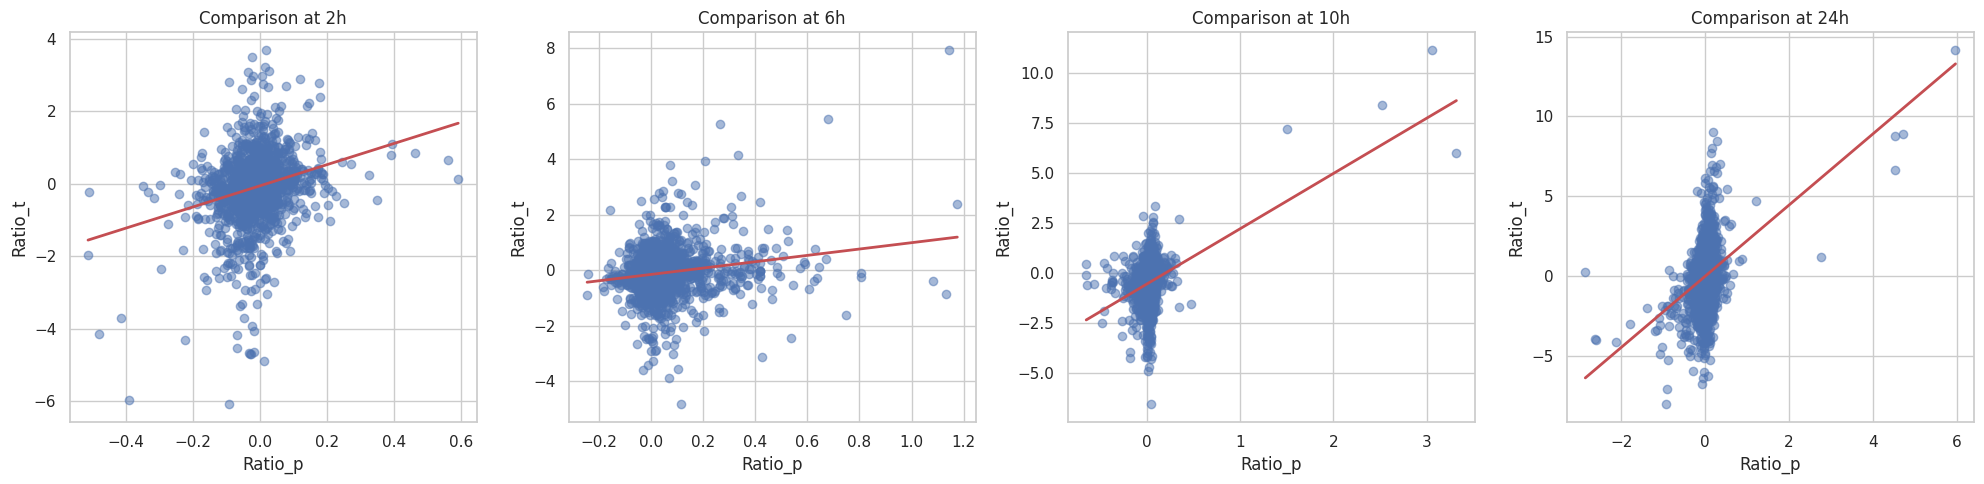

In [42]:
# generate scatter plot use the filtered data based on p value

# Create a figure and adjust its size
# ,sharex=true, sharey=true to put all graph in one scale for better comparison
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Timepoints list for easy reference in loops
timepoints = ['2h', '6h', '10h', '24h']

# Loop through each timepoint and create a scatter plot of ratio_t vs ratio_p
for i, tp in enumerate(timepoints):
    ax = axes[i]
    ratio_t_col = f'Ratio_t {tp}'
    ratio_p_col = f'Ratio_p {tp}'

    # Ensure data is numeric and handle any NaN values for plotting
    x = pd.to_numeric(filtered_df[ratio_p_col], errors='coerce')
    y = pd.to_numeric(filtered_df[ratio_t_col], errors='coerce')

    # Scatter plot
    ax.scatter(x, y, alpha=0.5)

    # Fit a line through the data points
    valid_mask = ~np.isnan(x) & ~np.isnan(y)  # Mask to remove NaN values for fitting
    fit = np.polyfit(x[valid_mask], y[valid_mask], 1)
    fit_fn = np.poly1d(fit)

    # Plot the line
    linspace_x = np.linspace(min(x[valid_mask]), max(x[valid_mask]), 100)
    ax.plot(linspace_x, fit_fn(linspace_x), 'r-', linewidth=2)

    # Set titles and labels
    ax.set_title(f'Comparison at {tp}')
    ax.set_xlabel('Ratio_p')
    ax.set_ylabel('Ratio_t')

plt.tight_layout()
plt.show()

### Visualise covid proteins only

In [43]:
# filter merged_df using covid_protein Accession column
covid_merged_df = merged_df[merged_df['UniProt Accession'].isin(covid_protein['Accession'])]
covid_merged_df


,UniProt Accession,Ratio_p 2h,Ratio_p 6h,Ratio_p 10h,Ratio_p 24h,P value 2h_p,P value 6h_p,P value 10h_p,P value 24h_p,Organism,Ratio_t 2h,Ratio_t 6h,Ratio_t 10h,Ratio_t 24h,P value 2h_t,P value 6h_t,P value 10h_t,P value 24h_t,Gene Symbol
490,P0DTC2,0.036043,0.680449,2.518067,4.717300,0.751902,0.002356,0.004366,0.000383,SARS-CoV-2,1.184392,5.438205,8.415059,8.902127,0.529105,0.006862,0.018798,0.015140,NaN
491,P0DTC7,0.141459,1.531263,3.415351,5.635877,0.682377,0.248183,0.138682,0.212725,SARS-CoV-2,-0.027188,6.319584,8.123193,9.315425,0.967251,0.167373,0.090049,0.089433,NaN
492,P0DTC8,-0.024870,1.175413,3.316865,4.528193,0.900313,0.110012,0.125219,0.112684,SARS-CoV-2,-0.577639,2.385625,6.010551,6.663208,0.554032,0.045858,0.112146,0.108459,NaN
493,P0DTC9,-0.045199,1.145207,3.055487,5.970873,0.583522,0.000017,0.000673,0.009528,SARS-CoV-2,-1.047701,7.933790,11.168525,14.158108,0.091440,0.005218,0.004665,0.008454,NaN
494,P0DTD2,0.040581,0.266253,1.501847,4.516557,0.235753,0.012200,0.001845,0.009432,SARS-CoV-2,0.760166,5.271856,7.224034,8.754183,0.523347,0.007432,0.036596,0.040991,NaN


In [44]:
# apply filter on p values

def filter_by_p_value(df, threshold=0.05):
    """
    Filters the DataFrame based on a p-value threshold for each time point.

    Args:
    df (DataFrame): The DataFrame to filter.
    threshold (float): The p-value threshold for significance, default is 0.05.

    Returns:
    DataFrame: A new DataFrame with only rows that meet the p-value threshold at any time point.
    """
    # Calculate the -log10 of the threshold for comparison
    log_threshold = -np.log10(threshold)

    # Filtering condition for each time point
    conditions = (
        (df['P value 2h_p'] <= threshold) |
        (df['P value 6h_p'] <= threshold) |
        (df['P value 10h_p'] <= threshold) |
        (df['P value 24h_p'] <= threshold) |
        (df['P value 2h_t'] <= threshold) |
        (df['P value 6h_t'] <= threshold) |
        (df['P value 10h_t'] <= threshold) |
        (df['P value 24h_t'] <= threshold)
    )

    # Filter the DataFrame based on the conditions
    filtered_df = df[conditions]

    return filtered_df

# Example usage:
filtered_df = filter_by_p_value(covid_merged_df, threshold=0.05)

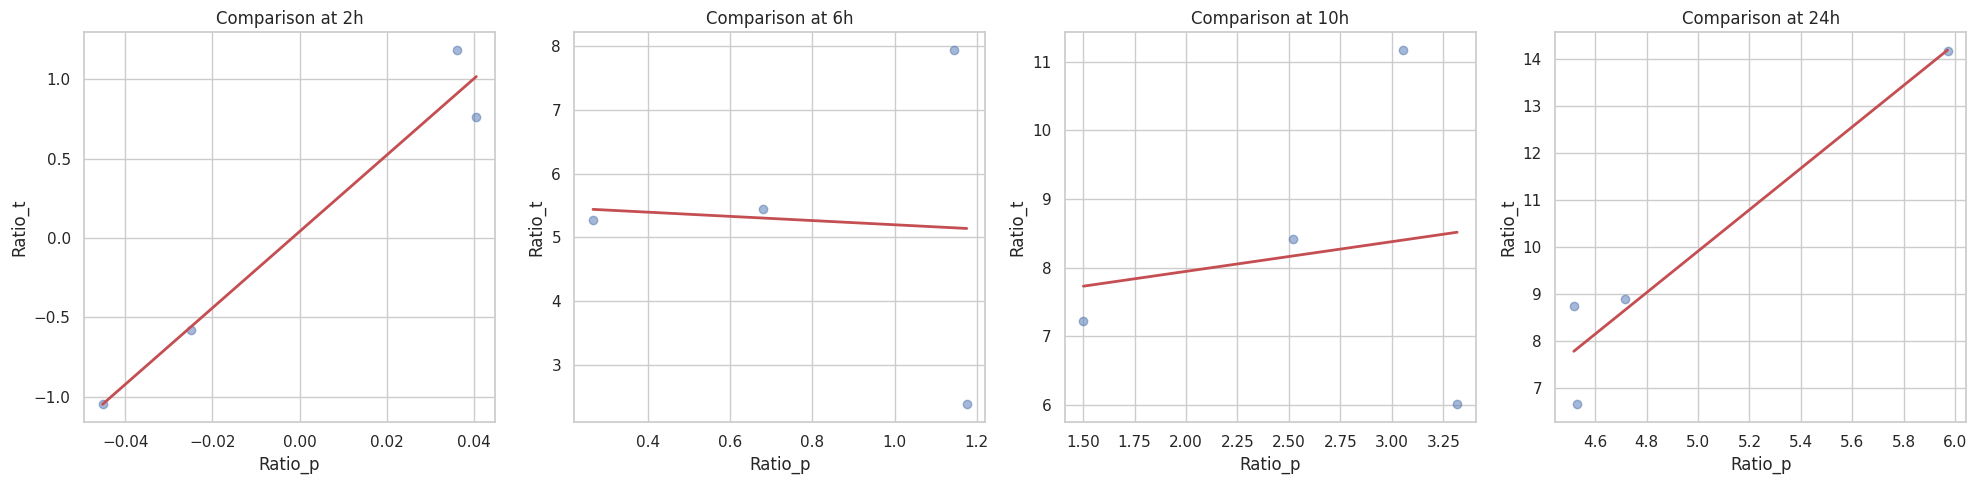

In [45]:
# generate scatter plot use the filtered data based on p value

# Create a figure and adjust its size
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Timepoints list for easy reference in loops
timepoints = ['2h', '6h', '10h', '24h']

# Loop through each timepoint and create a scatter plot of ratio_t vs ratio_p
for i, tp in enumerate(timepoints):
    ax = axes[i]
    ratio_t_col = f'Ratio_t {tp}'
    ratio_p_col = f'Ratio_p {tp}'

    # Ensure data is numeric and handle any NaN values for plotting
    x = pd.to_numeric(filtered_df[ratio_p_col], errors='coerce')
    y = pd.to_numeric(filtered_df[ratio_t_col], errors='coerce')

    # Scatter plot
    ax.scatter(x, y, alpha=0.5)

    # Fit a line through the data points
    valid_mask = ~np.isnan(x) & ~np.isnan(y)  # Mask to remove NaN values for fitting
    fit = np.polyfit(x[valid_mask], y[valid_mask], 1)
    fit_fn = np.poly1d(fit)

    # Plot the line
    linspace_x = np.linspace(min(x[valid_mask]), max(x[valid_mask]), 100)
    ax.plot(linspace_x, fit_fn(linspace_x), 'r-', linewidth=2)

    # Set titles and labels
    ax.set_title(f'Comparison at {tp}')
    ax.set_xlabel('Ratio_p')
    ax.set_ylabel('Ratio_t')

plt.tight_layout()
plt.show()